# 실전: 시카고 샌드위치 맛집 소개 사이트에 접근하기
* BeautifulSoup API Document
    * https://www.crummy.com/software/BeautifulSoup/bs4/doc/#

In [4]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

In [28]:
# 메인 페이지 로딩
url_base = 'http://www.chicagomag.com'
url_sub = '/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'
url = url_base + url_sub

html = urlopen(url)
soup = BeautifulSoup(html, "html.parser")

In [29]:
# 접근한 웹 페이지에서 원하는 데이터 추출하고 정리
# ex> print(soup.find_all('div', 'sammy')[0])
'''
<div class="sammy" style="position: relative;">
    <div class="sammyRank">1</div>
    <div class="sammyListing">
        <a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
            Old Oak Tap<br><em>Read more</em> 
        </a>
    </div>
</div>
'''

'\n<div class="sammy" style="position: relative;">\n    <div class="sammyRank">1</div>\n    <div class="sammyListing">\n        <a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>\n            Old Oak Tap<br><em>Read more</em> \n        </a>\n    </div>\n</div>\n'

## 주요 API로 관련 값 확인해보기

In [30]:
tmp_one = soup.find_all('div', 'sammy')[0]
type(tmp_one)

bs4.element.Tag

In [31]:
tmp_one.find(class_='sammyRank')

<div class="sammyRank">1</div>

In [32]:
tmp_one.find(class_='sammyRank').get_text()

'1'

In [33]:
tmp_one.find(class_='sammyListing').get_text()

'BLT\r\nOld Oak Tap\nRead more '

In [34]:
tmp_one.find(class_='sammyListing').get_text("|", strip=True)

'BLT|Old Oak Tap|Read more'

In [35]:
tmp_string = tmp_one.find(class_='sammyListing').get_text("|", strip=True)
tmp_string_list = tmp_string.split('|')
print(tmp_string_list[0])
print(tmp_string_list[1])

BLT
Old Oak Tap


In [36]:
tmp_one.find('a')['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

## 랭크, 메뉴, 레스토랑 이름, 링크 정보 추출하여 정리

In [44]:
from urllib.parse import urljoin

rank = []
main_menu = []
cafe_name = []
url_add = []

list_soup = soup.find_all('div', 'sammy')
for item in list_soup:
    #랭크
    rank.append(item.find(class_='sammyRank').get_text())
    #메뉴 + 이름
    tmp_string = item.find(class_='sammyListing').get_text("|", strip=True)
    tmp_string_list = tmp_string.split('|')
    main_menu.append(tmp_string_list[0])
    cafe_name.append(tmp_string_list[1])
    # 링크 
    url_add.append(urljoin(url_base, item.find('a')['href']))

In [39]:
rank[:5]

['1', '2', '3', '4', '5']

In [45]:
main_menu[:5]

['BLT', 'Fried Bologna', 'Woodland Mushroom', 'Roast Beef', 'PB&L']

In [46]:
cafe_name[:5]

['Old Oak Tap', 'Au Cheval', 'Xoco', 'Al’s Deli', 'Publican Quality Meats']

In [47]:
url_add[:5]

['http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/']

In [48]:
len(rank), len(main_menu), len(cafe_name), len(url_add)

(50, 50, 50, 50)

# Pandas로 이쁘게 데이터 정리 및 저장

In [51]:
import pandas as pd

data = {'Rank':rank, 'Menu':main_menu, 'Cafe':cafe_name, 'URL':url_add}

In [52]:
df = pd.DataFrame(data, columns=['Rank','Cafe','Menu','URL'])
df.head(5)

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [53]:
# 데이터 저장 
df.to_csv('./data/03. best_sandwiches_list_chicago.csv', sep=',', encoding='UTF-8')

# 다수의 웹 페이지에 자동으로 접근해서 원하는 정보 가져오기

In [58]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd

In [59]:
df = pd.read_csv('./data/03. best_sandwiches_list_chicago.csv', index_col=0)
df.head()

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/



<!DOCTYPE doctype html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  1. Old Oak Tap BLT |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
<meta content="“Truly inspired.”" name="description"/>
<!-- <meta name="description" content="&#8220;Truly inspired.&#8221;"> -->
<meta content="" name="keywords"/>
<meta content="37873197144" property="fb:pages">
<link href="//cloud.typography.com" rel="dns-prefetch"/>
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com" rel="dns-prefetch"/>
<link href="//ox-d.godengo.com/" rel="dns-prefetch"/>
<link href="//www.google-analytics.com" rel="dns-prefetch"
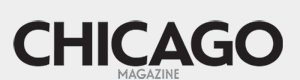

In [61]:
# 첫 번째 랭킹 1위 페이지 로딩해보기
page_url = df['URL'][0]
print(page_url)
html = urlopen(page_url)
soup_tmp = BeautifulSoup(html, "html.parser")
soup_tmp

In [62]:
'''
<p class="addy">
    <em>$10. 2109 W. Chicago Ave., 773-772-0406, <a href="http://www.theoldoaktap.com/">theoldoaktap.com</a></em>
</p>
'''
print(soup_tmp.find('p', 'addy'))

<p class="addy">
<em>$10. 2109 W. Chicago Ave., 773-772-0406, <a href="http://www.theoldoaktap.com/">theoldoaktap.com</a></em></p>


In [63]:
price_tmp = soup_tmp.find('p', 'addy').get_text()
price_tmp

'\n$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

In [64]:
price_tmp.split()

['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']

## 상세페이지 가격, 주소, 전화번호 추출하여 저장하기